# Which factors are most associated with Systemic Crises in Africa?" And; At which annual rate of inflation does an Inflation Crisis become a practical certainty?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading in our dataframe
df = pd.read_csv('african_crises.csv')

In [3]:
# visualizing our dataframe structure
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [4]:
# to see the data type for each column in our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [3]:
# basic stats data for our data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
case,1059.0,35.613787,23.692402,1.000000,15.000000,38.00000,56.000000,7.000000e+01
year,1059.0,1967.767705,33.530632,1860.000000,1951.000000,1973.00000,1994.000000,2.014000e+03
systemic_crisis,1059.0,0.077432,0.267401,0.000000,0.000000,0.00000,0.000000,1.000000e+00
exch_usd,1059.0,43.140831,111.475380,0.000000,0.195350,0.86840,8.462750,7.443061e+02
domestic_debt_in_default,1059.0,0.039660,0.195251,0.000000,0.000000,0.00000,0.000000,1.000000e+00
sovereign_external_debt_default,1059.0,0.152975,0.360133,0.000000,0.000000,0.00000,0.000000,1.000000e+00
gdp_weighted_default,1059.0,0.006402,0.043572,0.000000,0.000000,0.00000,0.000000,4.000000e-01
inflation_annual_cpi,1059.0,20848.892444,675727.429176,-28.502137,2.086162,5.76233,11.644048,2.198970e+07
independence,1059.0,0.776204,0.416984,0.000000,1.000000,1.00000,1.000000,1.000000e+00
currency_crises,1059.0,0.132200,0.349847,0.000000,0.000000,0.00000,0.000000,2.000000e+00


In [13]:
# checking for consistent data format and noticed some 2's
df['currency_crises'].value_counts()

0    923
1    132
2      4
Name: currency_crises, dtype: int64

In [14]:
# replaces the 2's with nan 
df['currency_crises'] = df['currency_crises'].replace(to_replace=2, value=np.nan)

In [15]:
# dropping case and cc3 column 
df.drop(labels=['case','cc3'],axis=1,inplace=True)

In [19]:
# replacing banking crisis or no crisis with a 0 or 1 
crisis_dict = {'crisis':1,'no_crisis':0}
df['banking_crisis'] = df['banking_crisis'].map(crisis_dict)


In [21]:
# drop all nan values in the dataframe
df = df.dropna()

In [98]:
# Checking to make sure all 
df['currency_crises'].value_counts()

0.0    923
1.0    132
Name: currency_crises, dtype: int64

In [99]:
# seeing what corrolations we can leverage from our dataset
df.corr()

,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
year,1.000000,0.198026,0.249495,0.131808,0.271012,-0.054175,0.037102,0.407166,0.193028,0.094928,0.212719
systemic_crisis,0.198026,1.000000,0.202363,0.127734,0.253737,0.005496,0.106436,0.147777,0.125626,0.174944,0.858754
exch_usd,0.249495,0.202363,1.000000,0.008688,0.428740,-0.040473,-0.011992,0.126895,-0.051832,-0.062707,0.170522
domestic_debt_in_default,0.131808,0.127734,0.008688,1.000000,0.457379,-0.029001,0.155702,0.106855,0.194934,0.206237,0.218355
sovereign_external_debt_default,0.271012,0.253737,0.428740,0.457379,1.000000,0.346798,0.073379,0.226747,0.177021,0.179674,0.261504
gdp_weighted_default,-0.054175,0.005496,-0.040473,-0.029001,0.346798,1.000000,-0.004515,0.078636,0.013746,0.018879,0.027422
inflation_annual_cpi,0.037102,0.106436,-0.011992,0.155702,0.073379,-0.004515,1.000000,0.016638,0.081741,0.080706,0.099411
independence,0.407166,0.147777,0.126895,0.106855,0.226747,0.078636,0.016638,1.000000,0.079993,-0.024972,0.159349
currency_crises,0.193028,0.125626,-0.051832,0.194934,0.177021,0.013746,0.081741,0.079993,1.000000,0.395448,0.165358
inflation_crises,0.094928,0.174944,-0.062707,0.206237,0.179674,0.018879,0.080706,-0.024972,0.395448,1.000000,0.231188


In [131]:
# correlated datapoints with respect to systemic crisis
df.corr()['systemic_crisis'].sort_values()

gdp_weighted_default               0.005496
inflation_annual_cpi               0.106436
currency_crises                    0.125626
domestic_debt_in_default           0.127734
independence                       0.147777
inflation_crises                   0.174944
year                               0.198026
exch_usd                           0.202363
sovereign_external_debt_default    0.253737
banking_crisis                     0.858754
systemic_crisis                    1.000000
Name: systemic_crisis, dtype: float64

In [132]:
# correlated datapoints with respect to inflation crisis
df.corr()['inflation_crises'].sort_values()

exch_usd                          -0.062707
independence                      -0.024972
gdp_weighted_default               0.018879
inflation_annual_cpi               0.080706
year                               0.094928
systemic_crisis                    0.174944
sovereign_external_debt_default    0.179674
domestic_debt_in_default           0.206237
banking_crisis                     0.231188
currency_crises                    0.395448
inflation_crises                   1.000000
Name: inflation_crises, dtype: float64

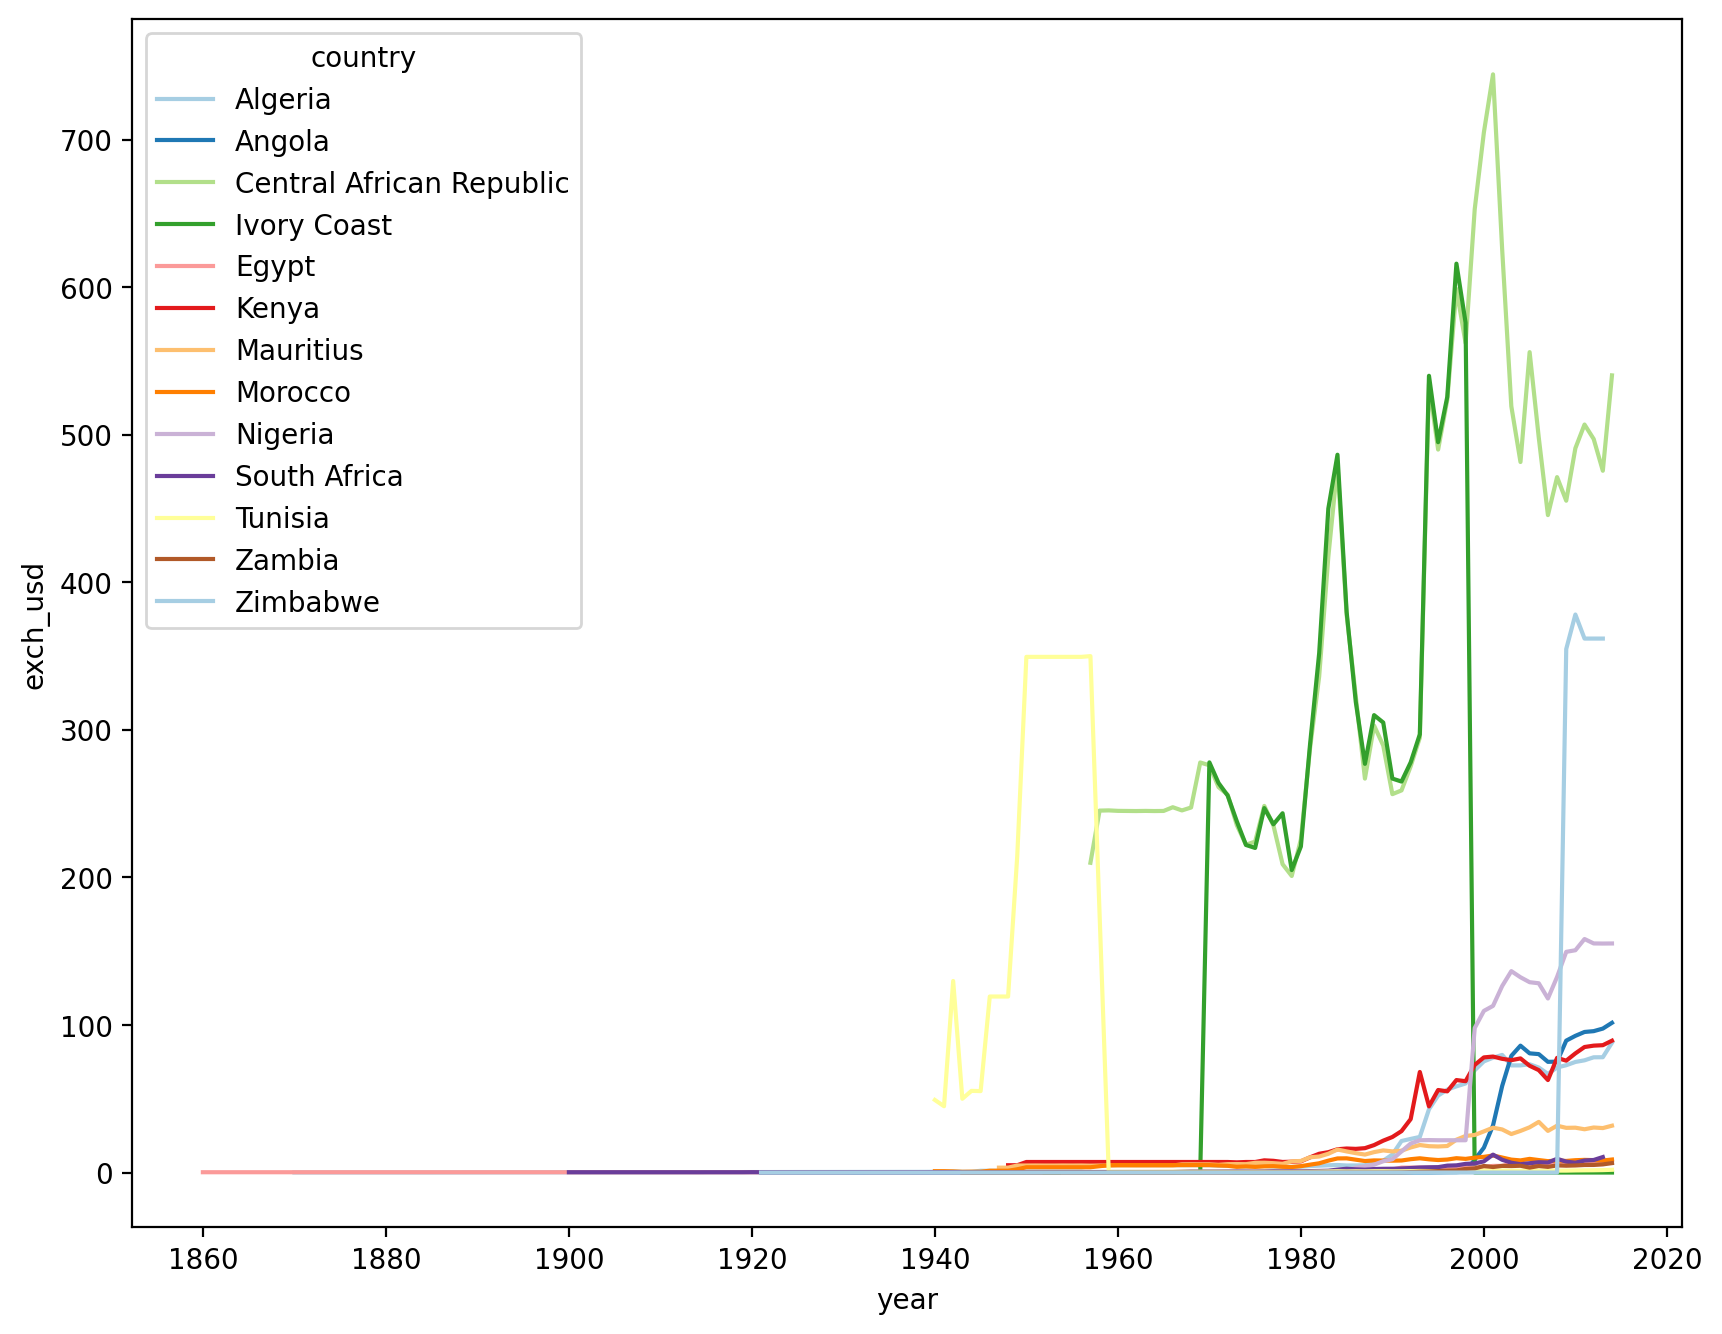

In [196]:
# how the exchange rate looks over the years for all 13 countries
plt.figure(figsize=(10,8),dpi=200)
sns.lineplot(data=df, x='year',y='exch_usd',hue='country',palette='Paired')
plt.savefig('exchange_rates.png')

In [ ]:
# Oberservation of the first plot, We can see that for almost all african contries 
# the exachange rates did not start flantuating till after 1960.

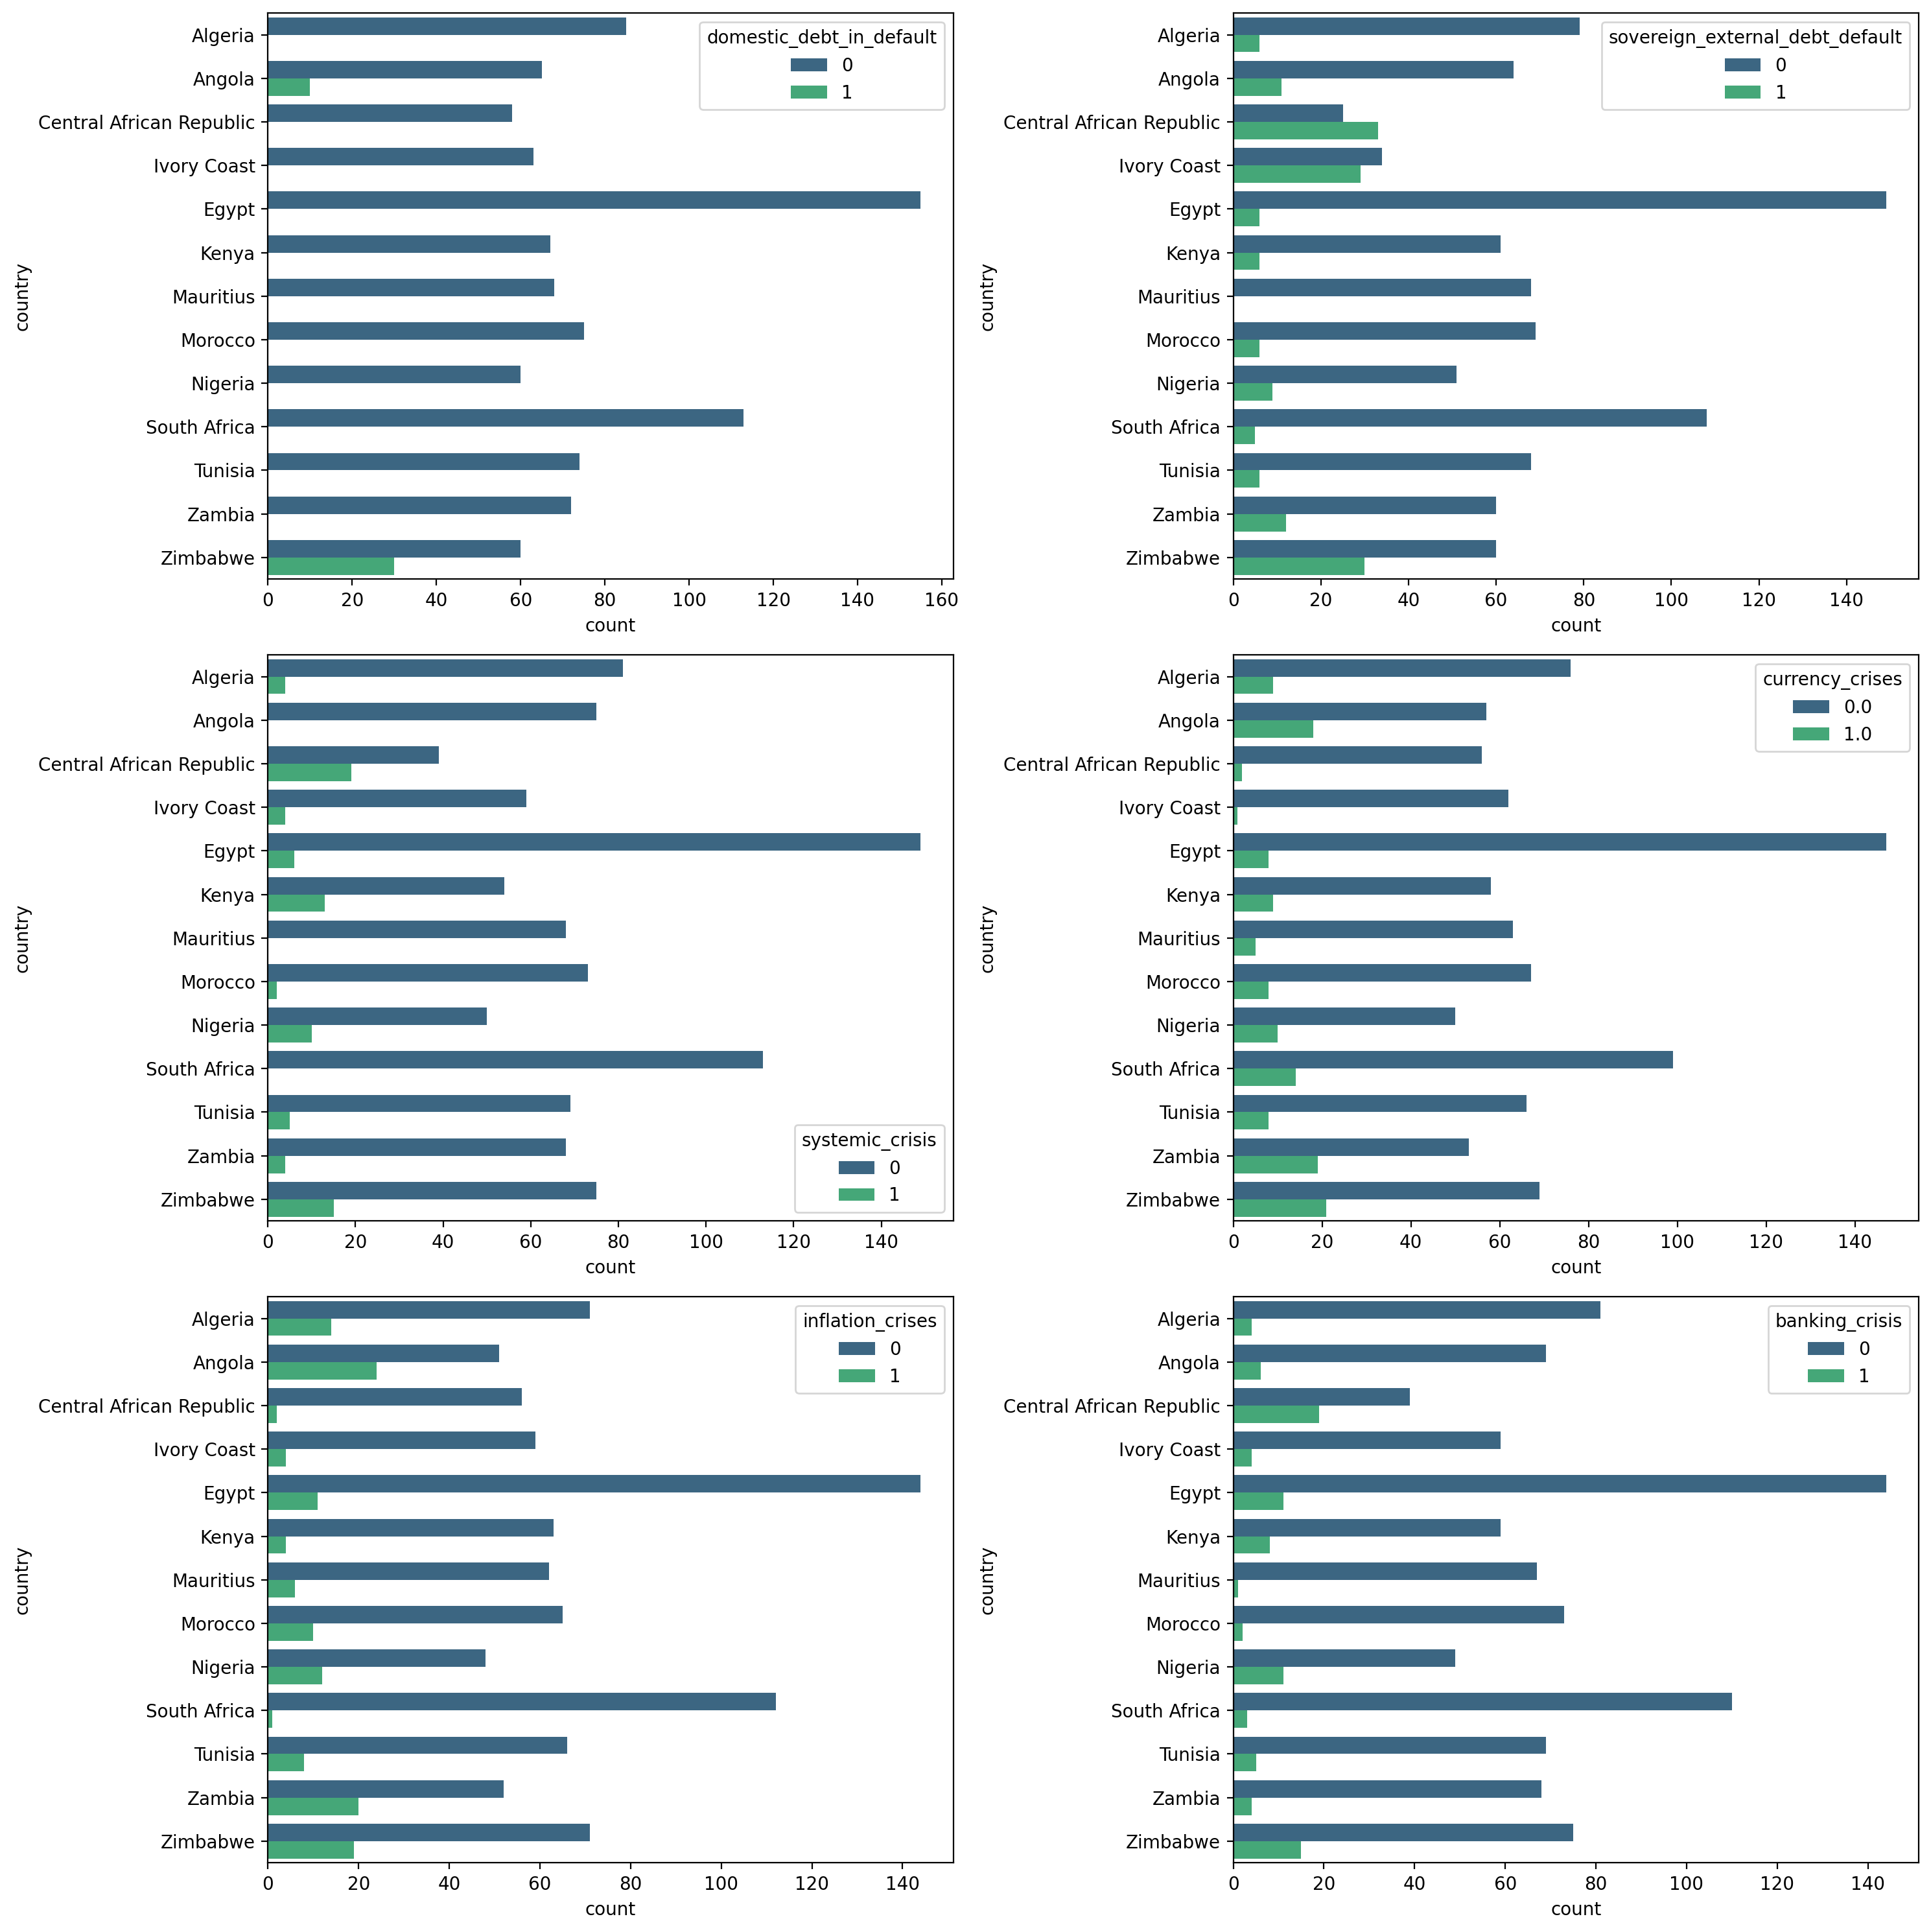

In [197]:
# visualizing debt defaults & crisis of all 13 african countries
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(15,15),dpi=200)
axes = axes.flatten()
columns  = ['domestic_debt_in_default', 'sovereign_external_debt_default',
        'systemic_crisis','currency_crises', 'inflation_crises', 'banking_crisis']
# loops through each 
for i,ax in zip(columns,axes):
    sns.countplot(data=df,ax=ax,y='country',hue= i,palette='viridis')
plt.tight_layout()
plt.savefig('overrall_default_and_crisis.png')

In [121]:
# Quantifying our data plot above
df.groupby('country').agg({'systemic_crisis':'sum','sovereign_external_debt_default':'sum','domestic_debt_in_default':'sum','currency_crises':'sum','inflation_crises':'sum','banking_crisis':'sum'}).sort_values('systemic_crisis', ascending = False)

,systemic_crisis,sovereign_external_debt_default,domestic_debt_in_default,currency_crises,inflation_crises,banking_crisis
country,,,,,,
Central African Republic,19,33,0,2.0,2,19
Zimbabwe,15,30,30,21.0,19,15
Kenya,13,6,0,9.0,4,8
Nigeria,10,9,0,10.0,12,11
Egypt,6,6,0,8.0,11,11
Tunisia,5,6,0,8.0,8,5
Algeria,4,6,0,9.0,14,4
Ivory Coast,4,29,0,1.0,4,4
Zambia,4,12,0,19.0,20,4


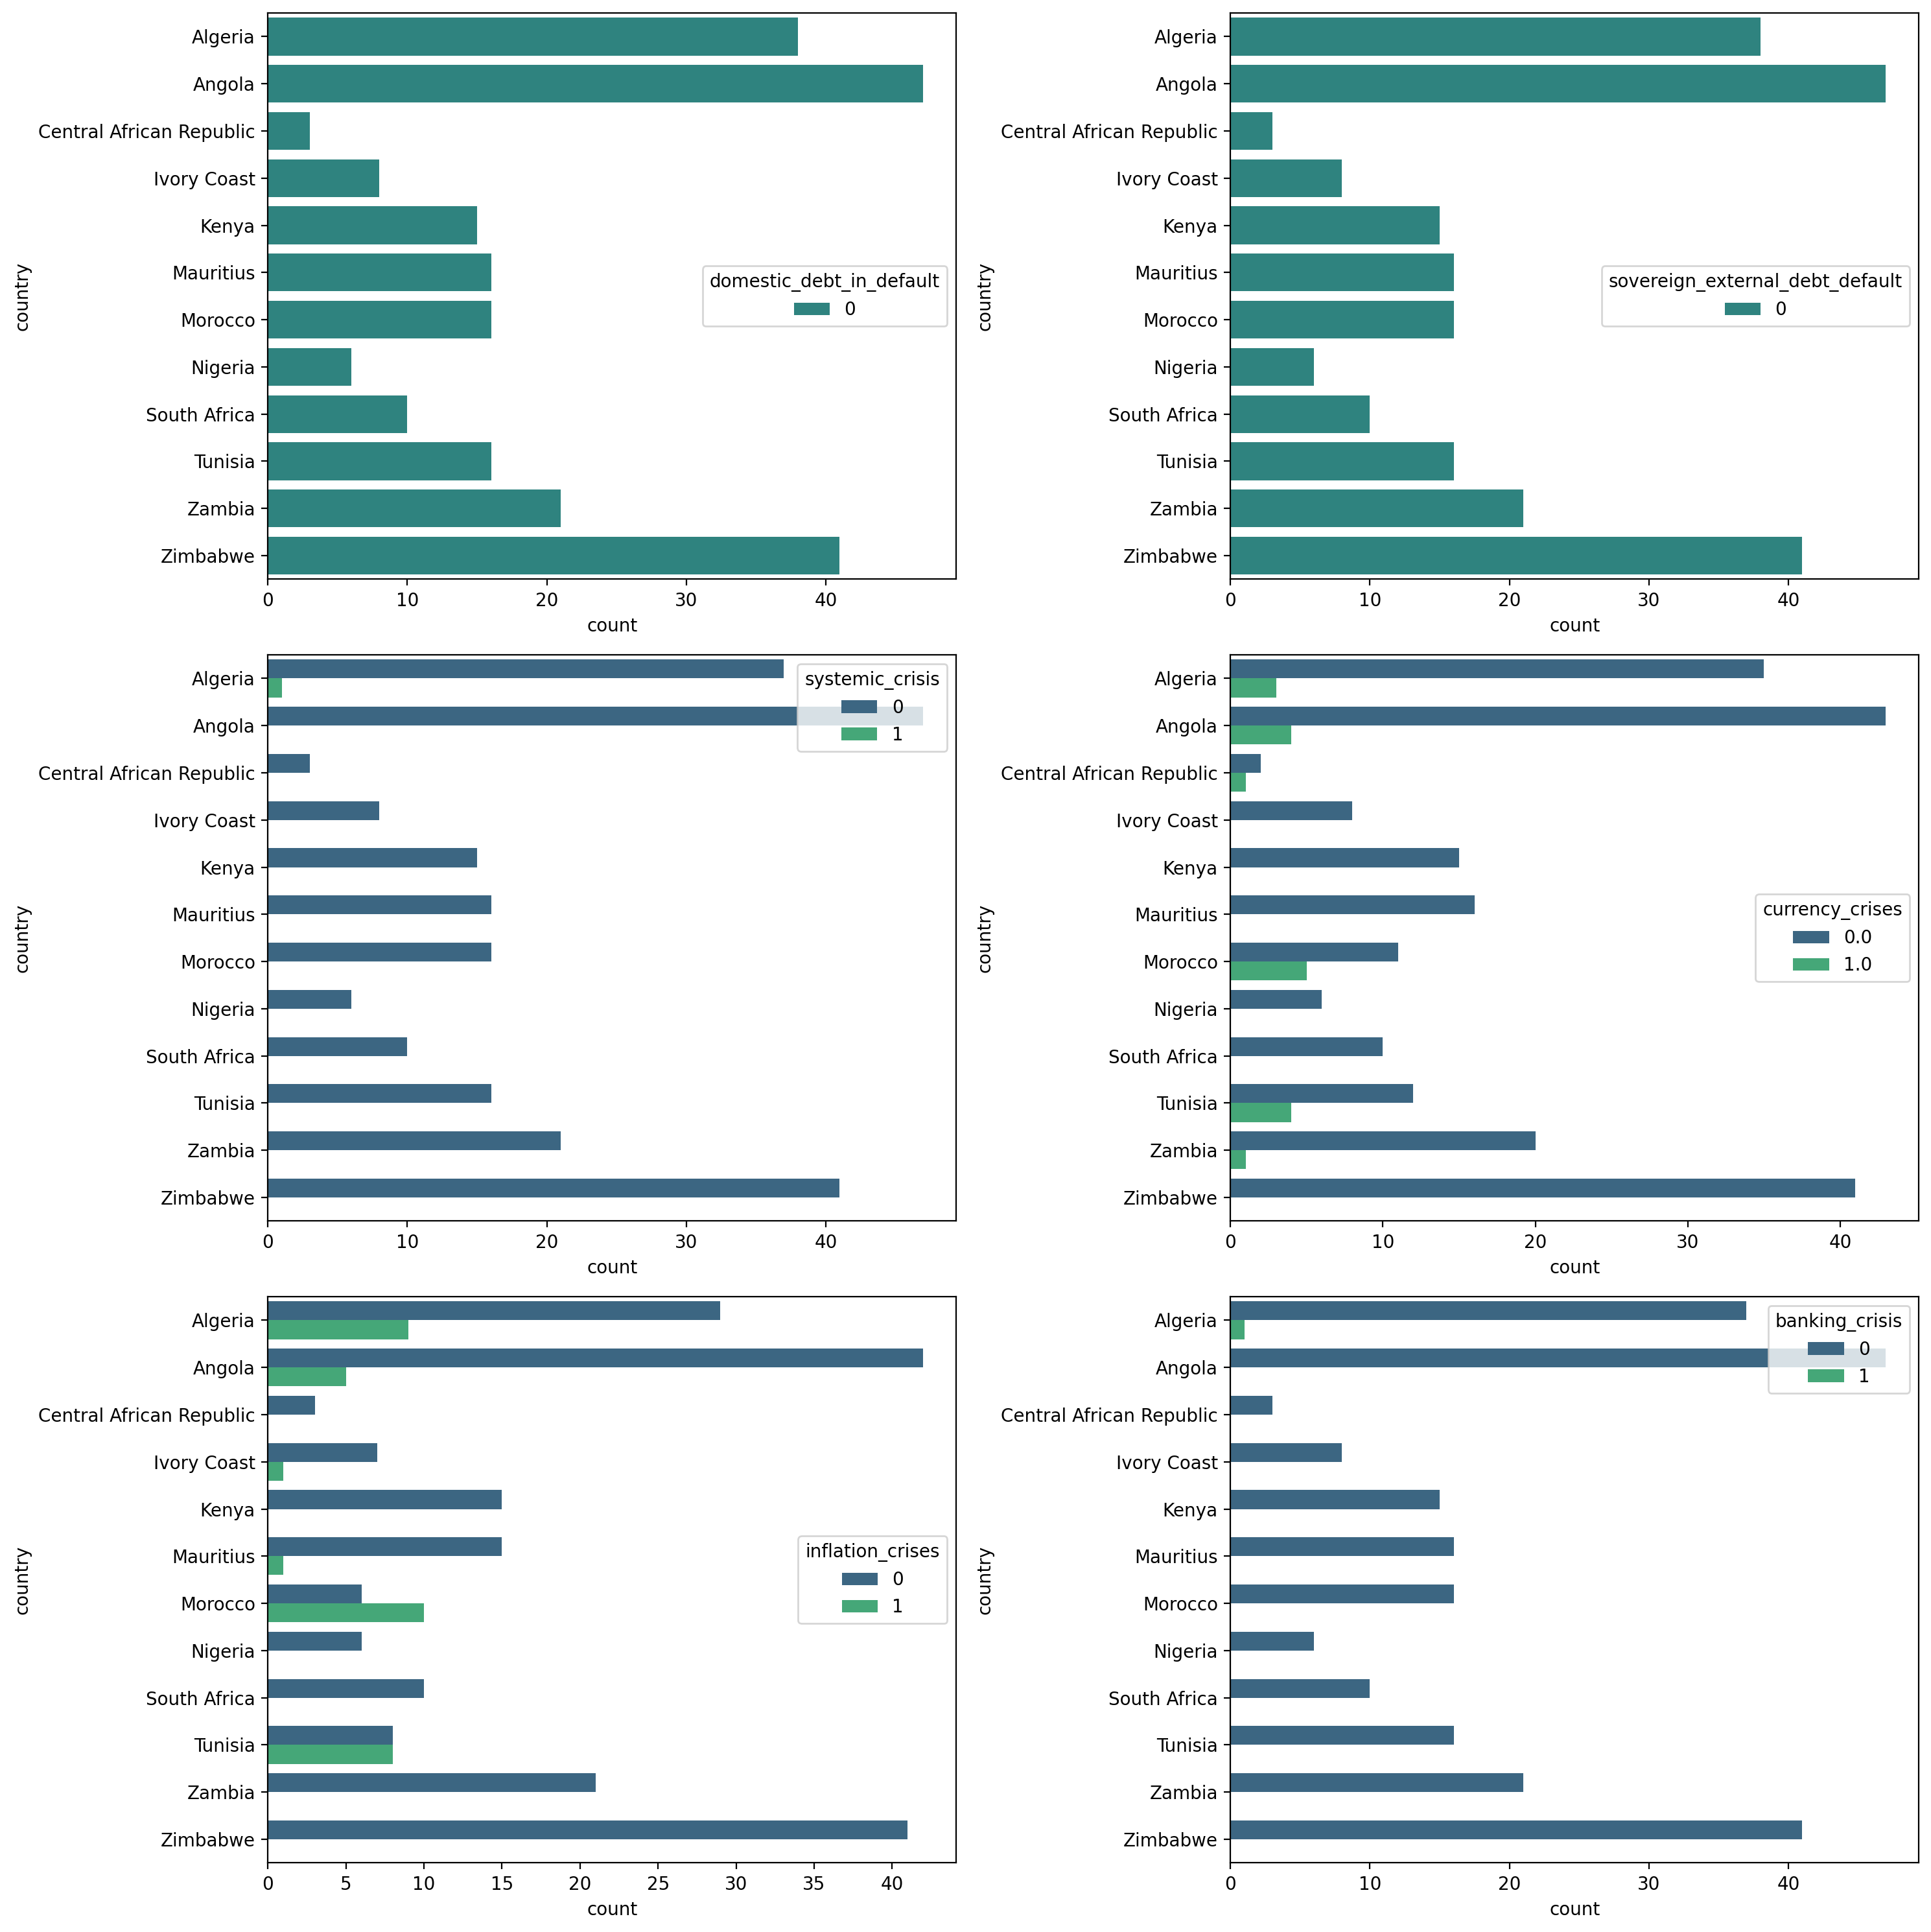

In [198]:
# visualizing what debt defaults and crisis look like before independence 
not_independent = df[df['independence'] == 0]
fig, axes =plt.subplots(nrows=3,ncols=2,figsize=(15,15),dpi=200)
axes = axes.flatten()
columns  = ['domestic_debt_in_default', 'sovereign_external_debt_default',
        'systemic_crisis','currency_crises', 'inflation_crises', 'banking_crisis']
for i,ax in zip(columns,axes):
    sns.countplot(data=not_independent,ax=ax,y='country',hue= i,palette='viridis')
plt.tight_layout()
plt.savefig('before_independence_default_and_crisis.png')

In [123]:
# Quantifying our plot above
not_independent.groupby('country').agg({'systemic_crisis':'sum','sovereign_external_debt_default':'sum','domestic_debt_in_default':'sum','currency_crises':'sum','inflation_crises':'sum','banking_crisis':'sum'})

,systemic_crisis,sovereign_external_debt_default,domestic_debt_in_default,currency_crises,inflation_crises,banking_crisis
country,,,,,,
Algeria,1,0,0,3.0,9,1
Angola,0,0,0,4.0,5,0
Central African Republic,0,0,0,1.0,0,0
Ivory Coast,0,0,0,0.0,1,0
Kenya,0,0,0,0.0,0,0
Mauritius,0,0,0,0.0,1,0
Morocco,0,0,0,5.0,10,0
Nigeria,0,0,0,0.0,0,0
South Africa,0,0,0,0.0,0,0


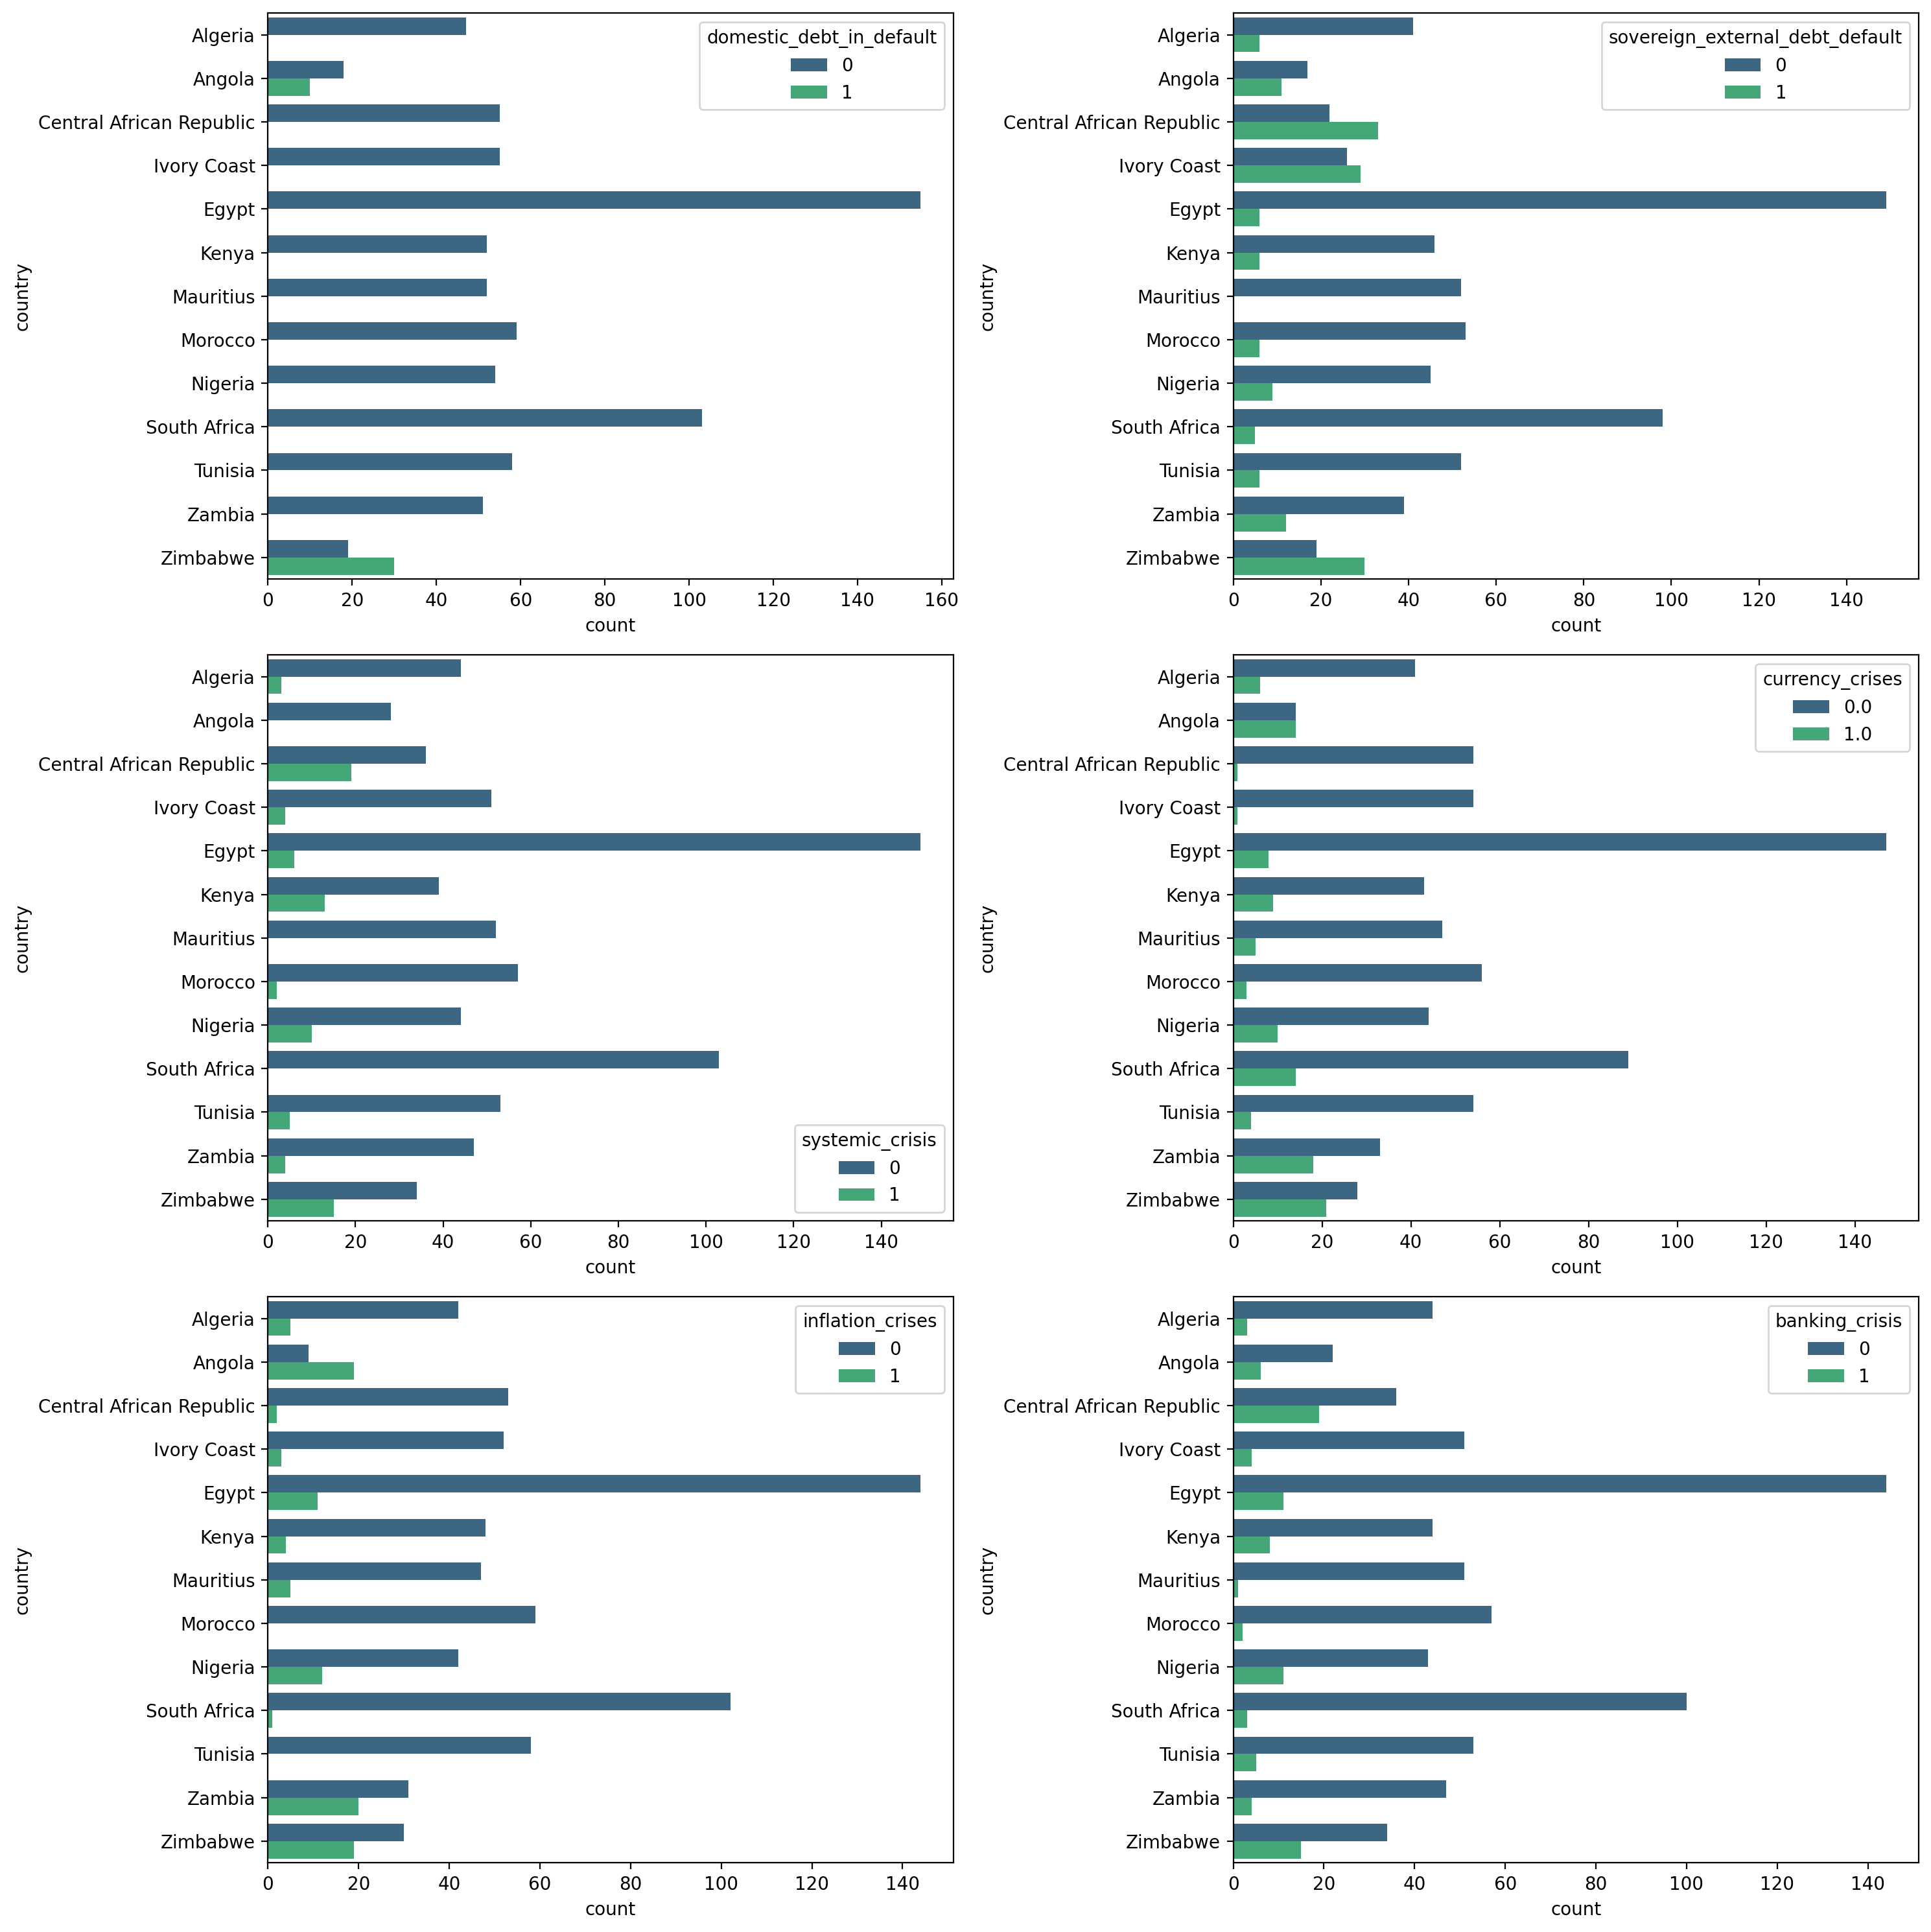

In [199]:
# visualizing what debt defaults and crisis look like after independence 
independent = df[df['independence'] == 1]
fig, axes =plt.subplots(nrows=3,ncols=2,figsize=(15,15),dpi=200)
axes = axes.flatten()
columns  = ['domestic_debt_in_default', 'sovereign_external_debt_default',
        'systemic_crisis','currency_crises', 'inflation_crises', 'banking_crisis']
for i,ax in zip(columns,axes):
    sns.countplot(data=independent,ax=ax,y='country',hue= i,palette='viridis')
plt.tight_layout()
plt.savefig('after_independence_default_and_crisis.png')

In [128]:
# quantifying the total amount of defaults and crisis
independent.groupby('country').agg({'systemic_crisis':'sum','sovereign_external_debt_default':'sum','domestic_debt_in_default':'sum','currency_crises':'sum','inflation_crises':'sum','banking_crisis':'sum'}).sort_values('systemic_crisis', ascending = False)

,systemic_crisis,sovereign_external_debt_default,domestic_debt_in_default,currency_crises,inflation_crises,banking_crisis
country,,,,,,
Central African Republic,19,33,0,1.0,2,19
Zimbabwe,15,30,30,21.0,19,15
Kenya,13,6,0,9.0,4,8
Nigeria,10,9,0,10.0,12,11
Egypt,6,6,0,8.0,11,11
Tunisia,5,6,0,4.0,0,5
Ivory Coast,4,29,0,1.0,3,4
Zambia,4,12,0,18.0,20,4
Algeria,3,6,0,6.0,5,3


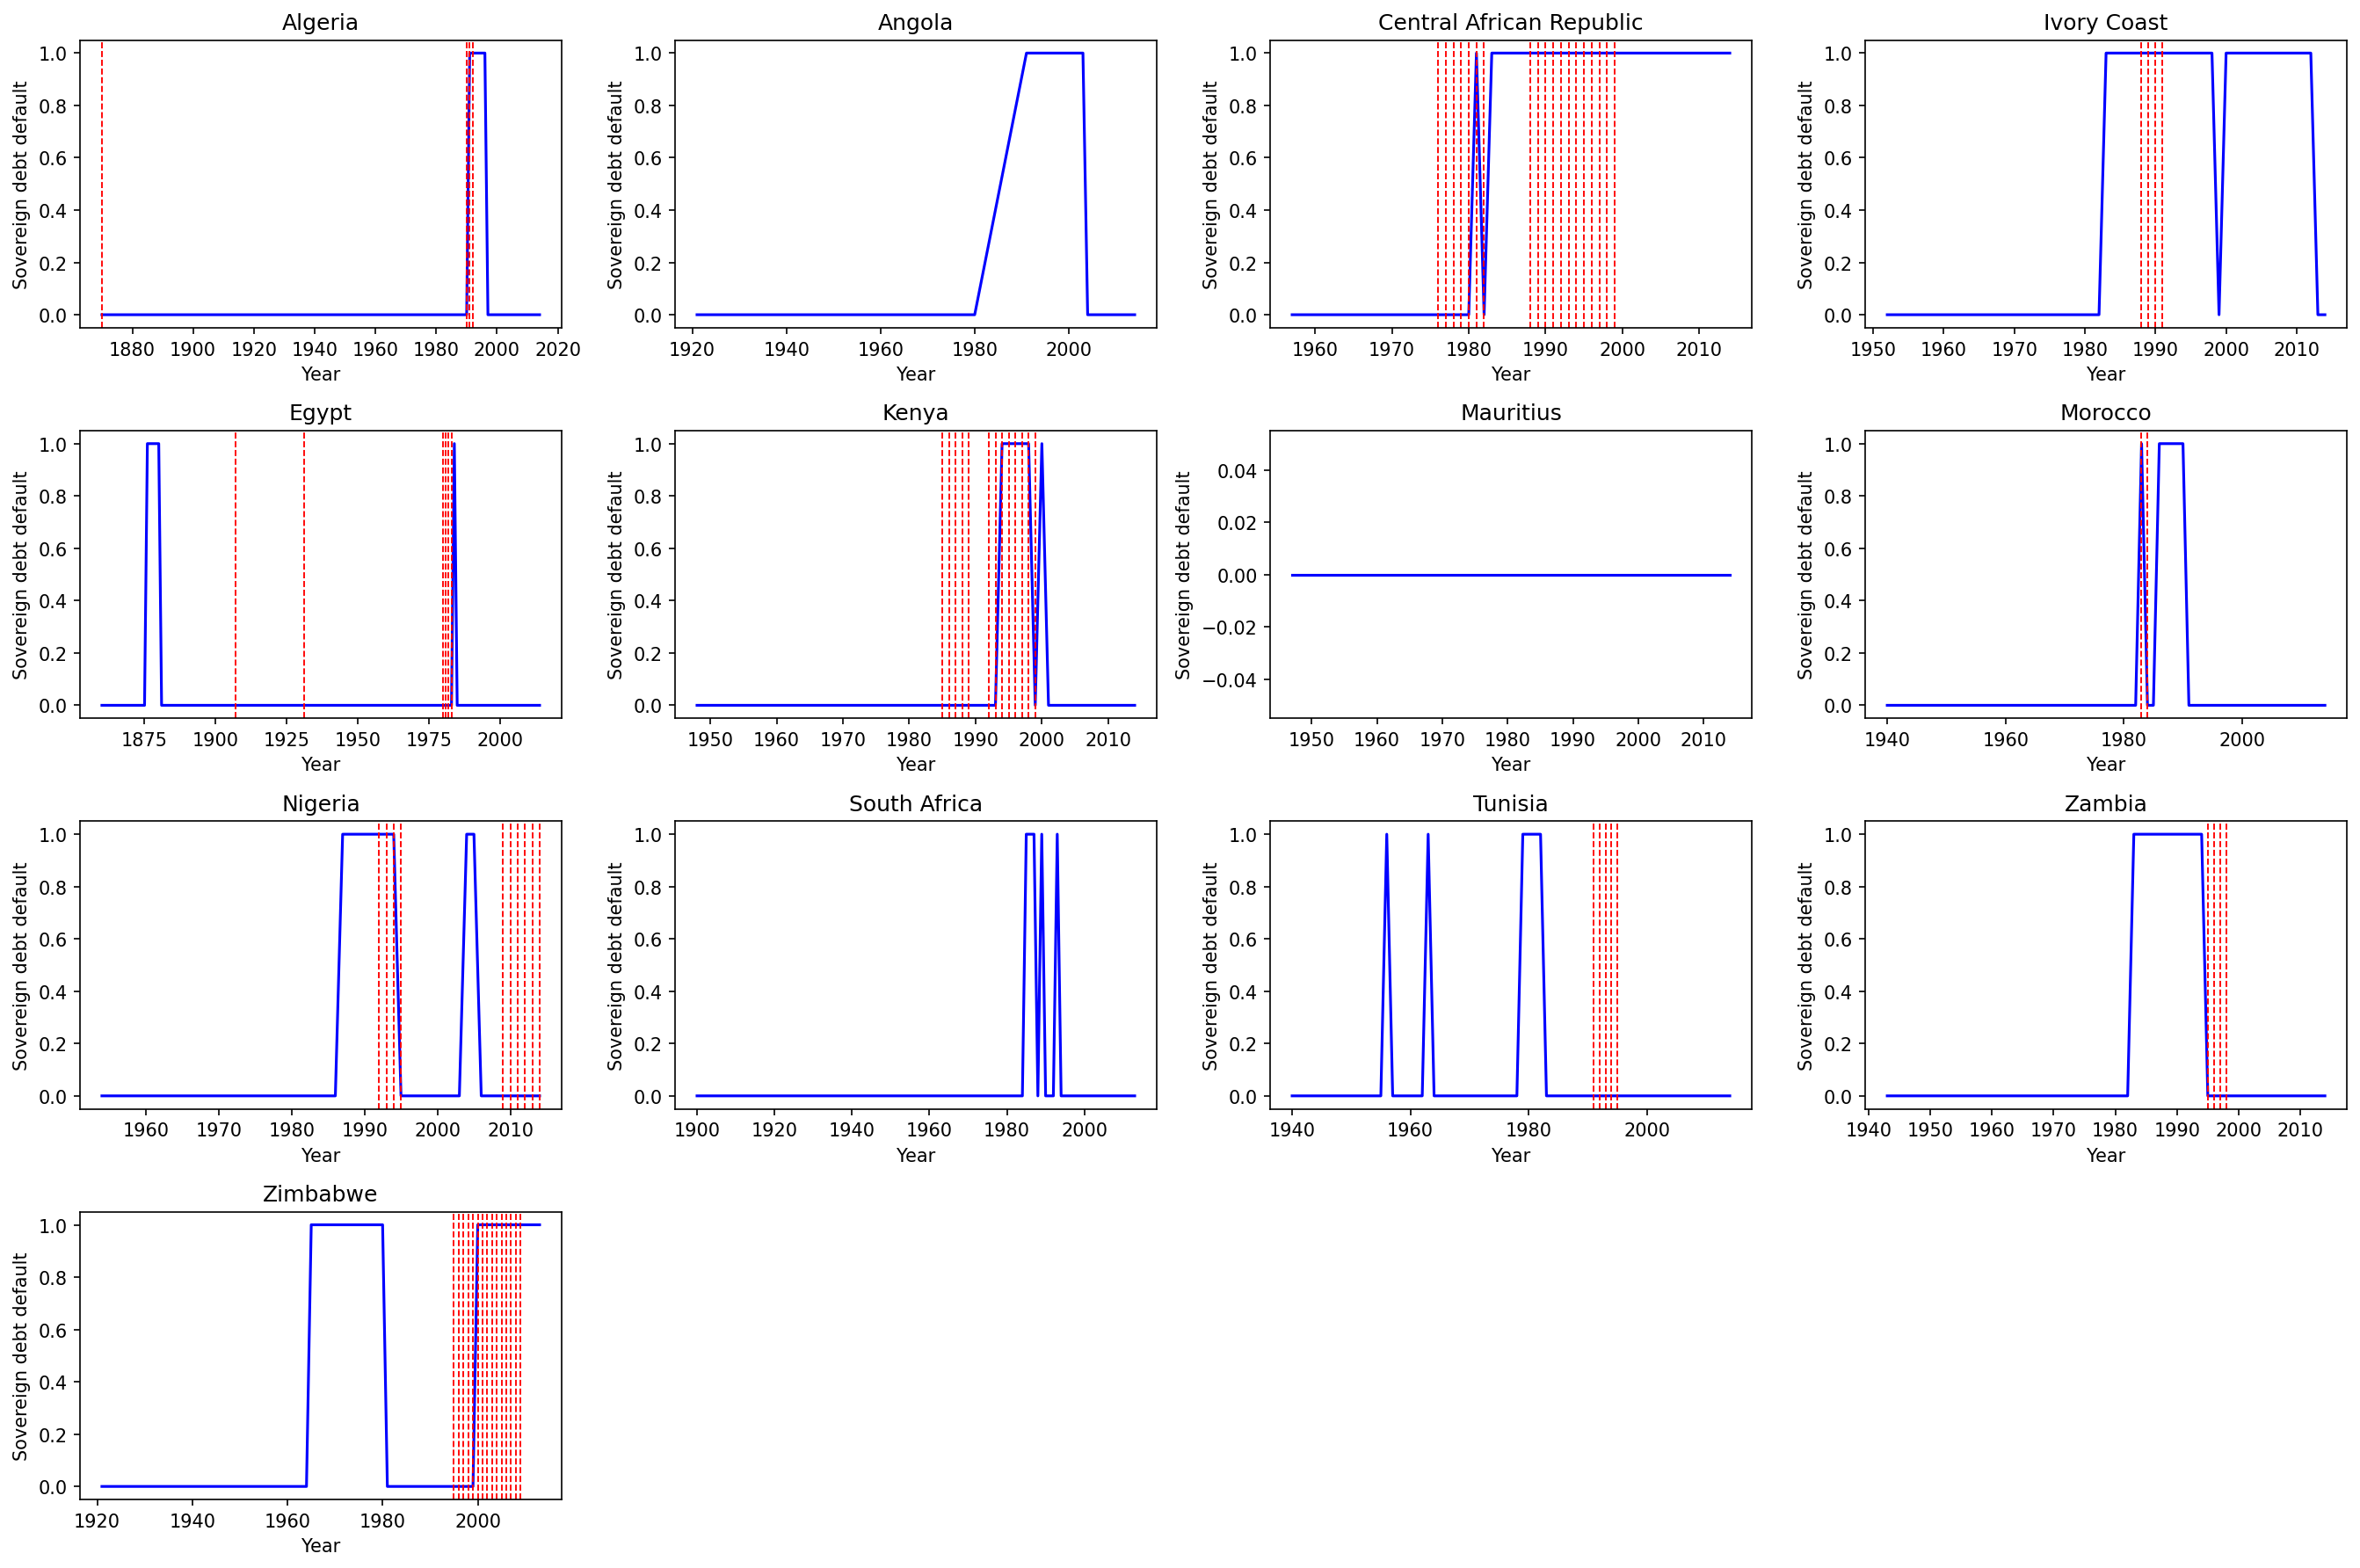

In [200]:
# Analyzing inflation in  regards to inflation annual cpi
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(18,12), dpi= 150)
axes = axes.flatten()
for i, ax in zip(df['country'].unique(), axes):
  sns.lineplot(x = 'year', y = 'sovereign_external_debt_default', data = df[df['country'] == i], ax = ax, color = 'blue')
  ax.set_xlabel('Year')
  ax.set_ylabel('Sovereign debt default')
  ax.set_title('{}'.format(i))
  systemic_crisis = df[(df['country'] == i) & (df['systemic_crisis'] == 1)]['year'].unique()
  for i in systemic_crisis:
    ax.axvline(x=i, color='red', linestyle='--', linewidth=.9)
fig.subplots_adjust(top=0.95)
for i in range(13,16):
  fig.delaxes(axes[i])
plt.tight_layout()
plt.savefig('sovereign_defaults_and_systemic_crisis.png')

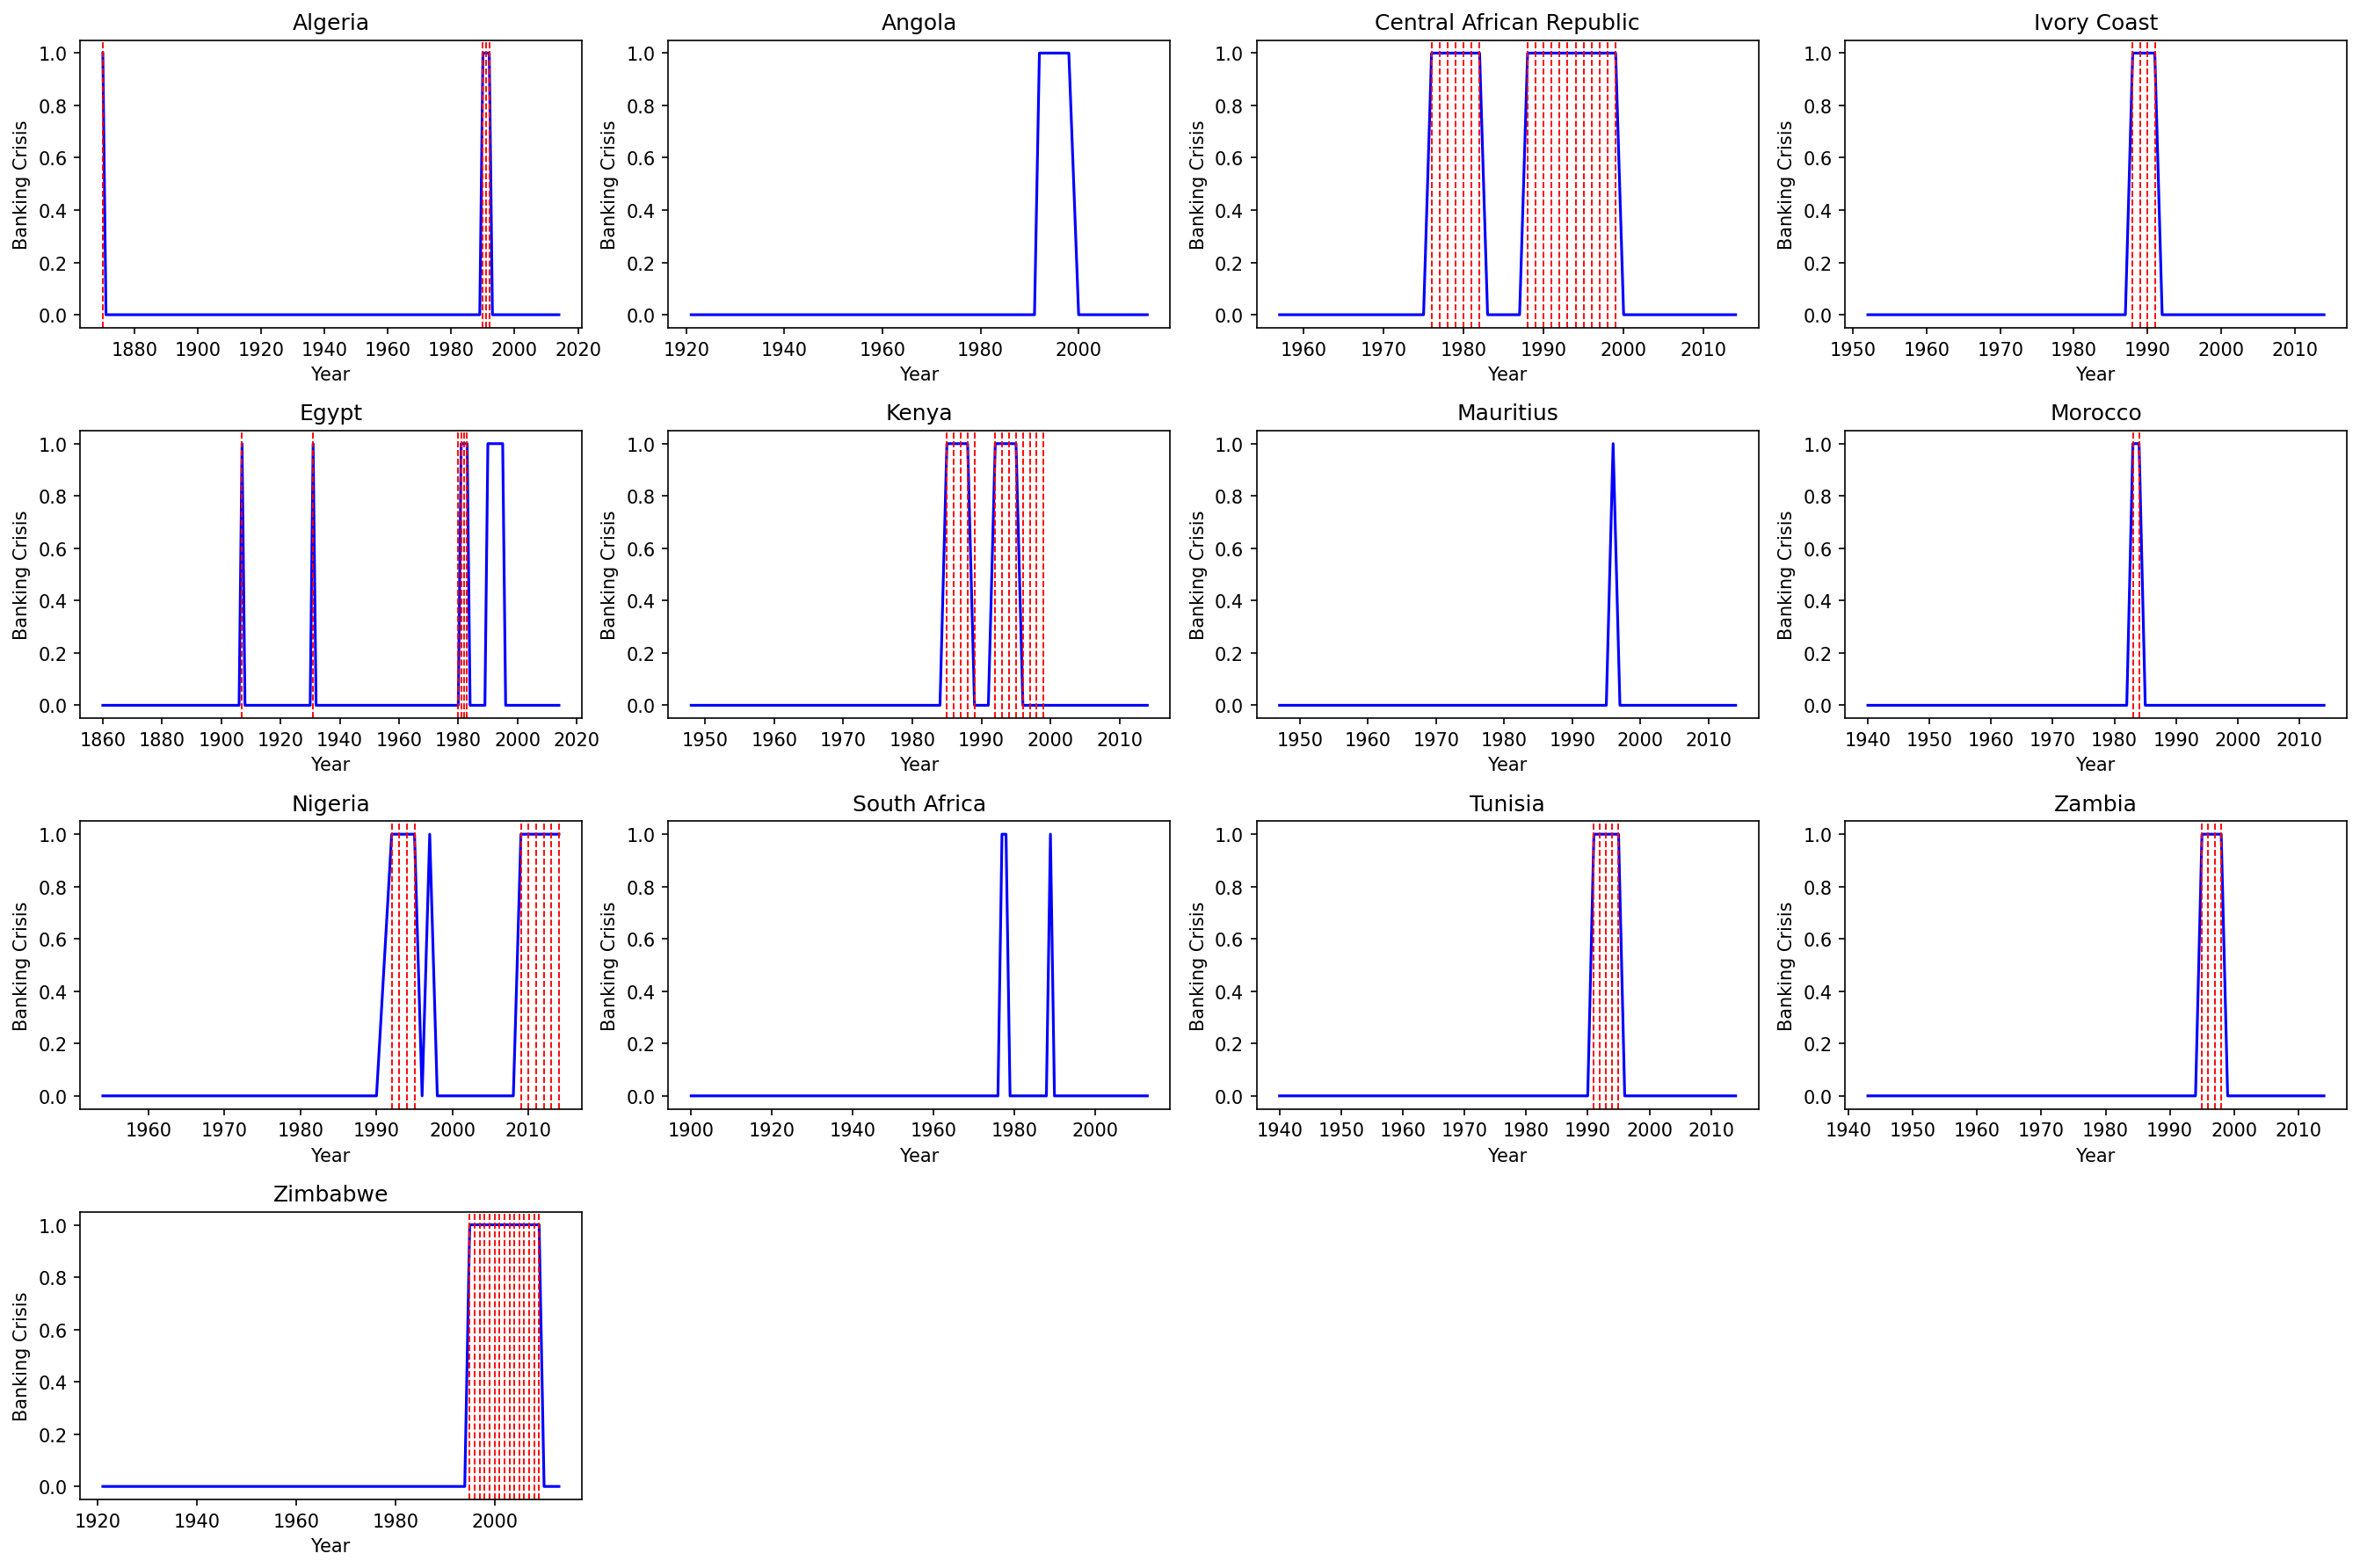

In [201]:
# Analyzing inflation in  regards to inflation annual cpi
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(18,12), dpi= 150)
axes = axes.flatten()
for i, ax in zip(df['country'].unique(), axes):
  sns.lineplot(x = 'year', y = 'banking_crisis', data = df[df['country'] == i], ax = ax, color = 'blue')
  ax.set_xlabel('Year')
  ax.set_ylabel('Banking Crisis')
  ax.set_title('{}'.format(i))
  systemic_crisis = df[(df['country'] == i) & (df['systemic_crisis'] == 1)]['year'].unique()
  for i in systemic_crisis:
    ax.axvline(x=i, color='red', linestyle='--', linewidth=.9)
fig.subplots_adjust(top=0.95)
for i in range(13,16):
  fig.delaxes(axes[i])
plt.tight_layout()
plt.savefig('banking_crisis_and_systemic_crisis.png')

# INFLATION CRISIS

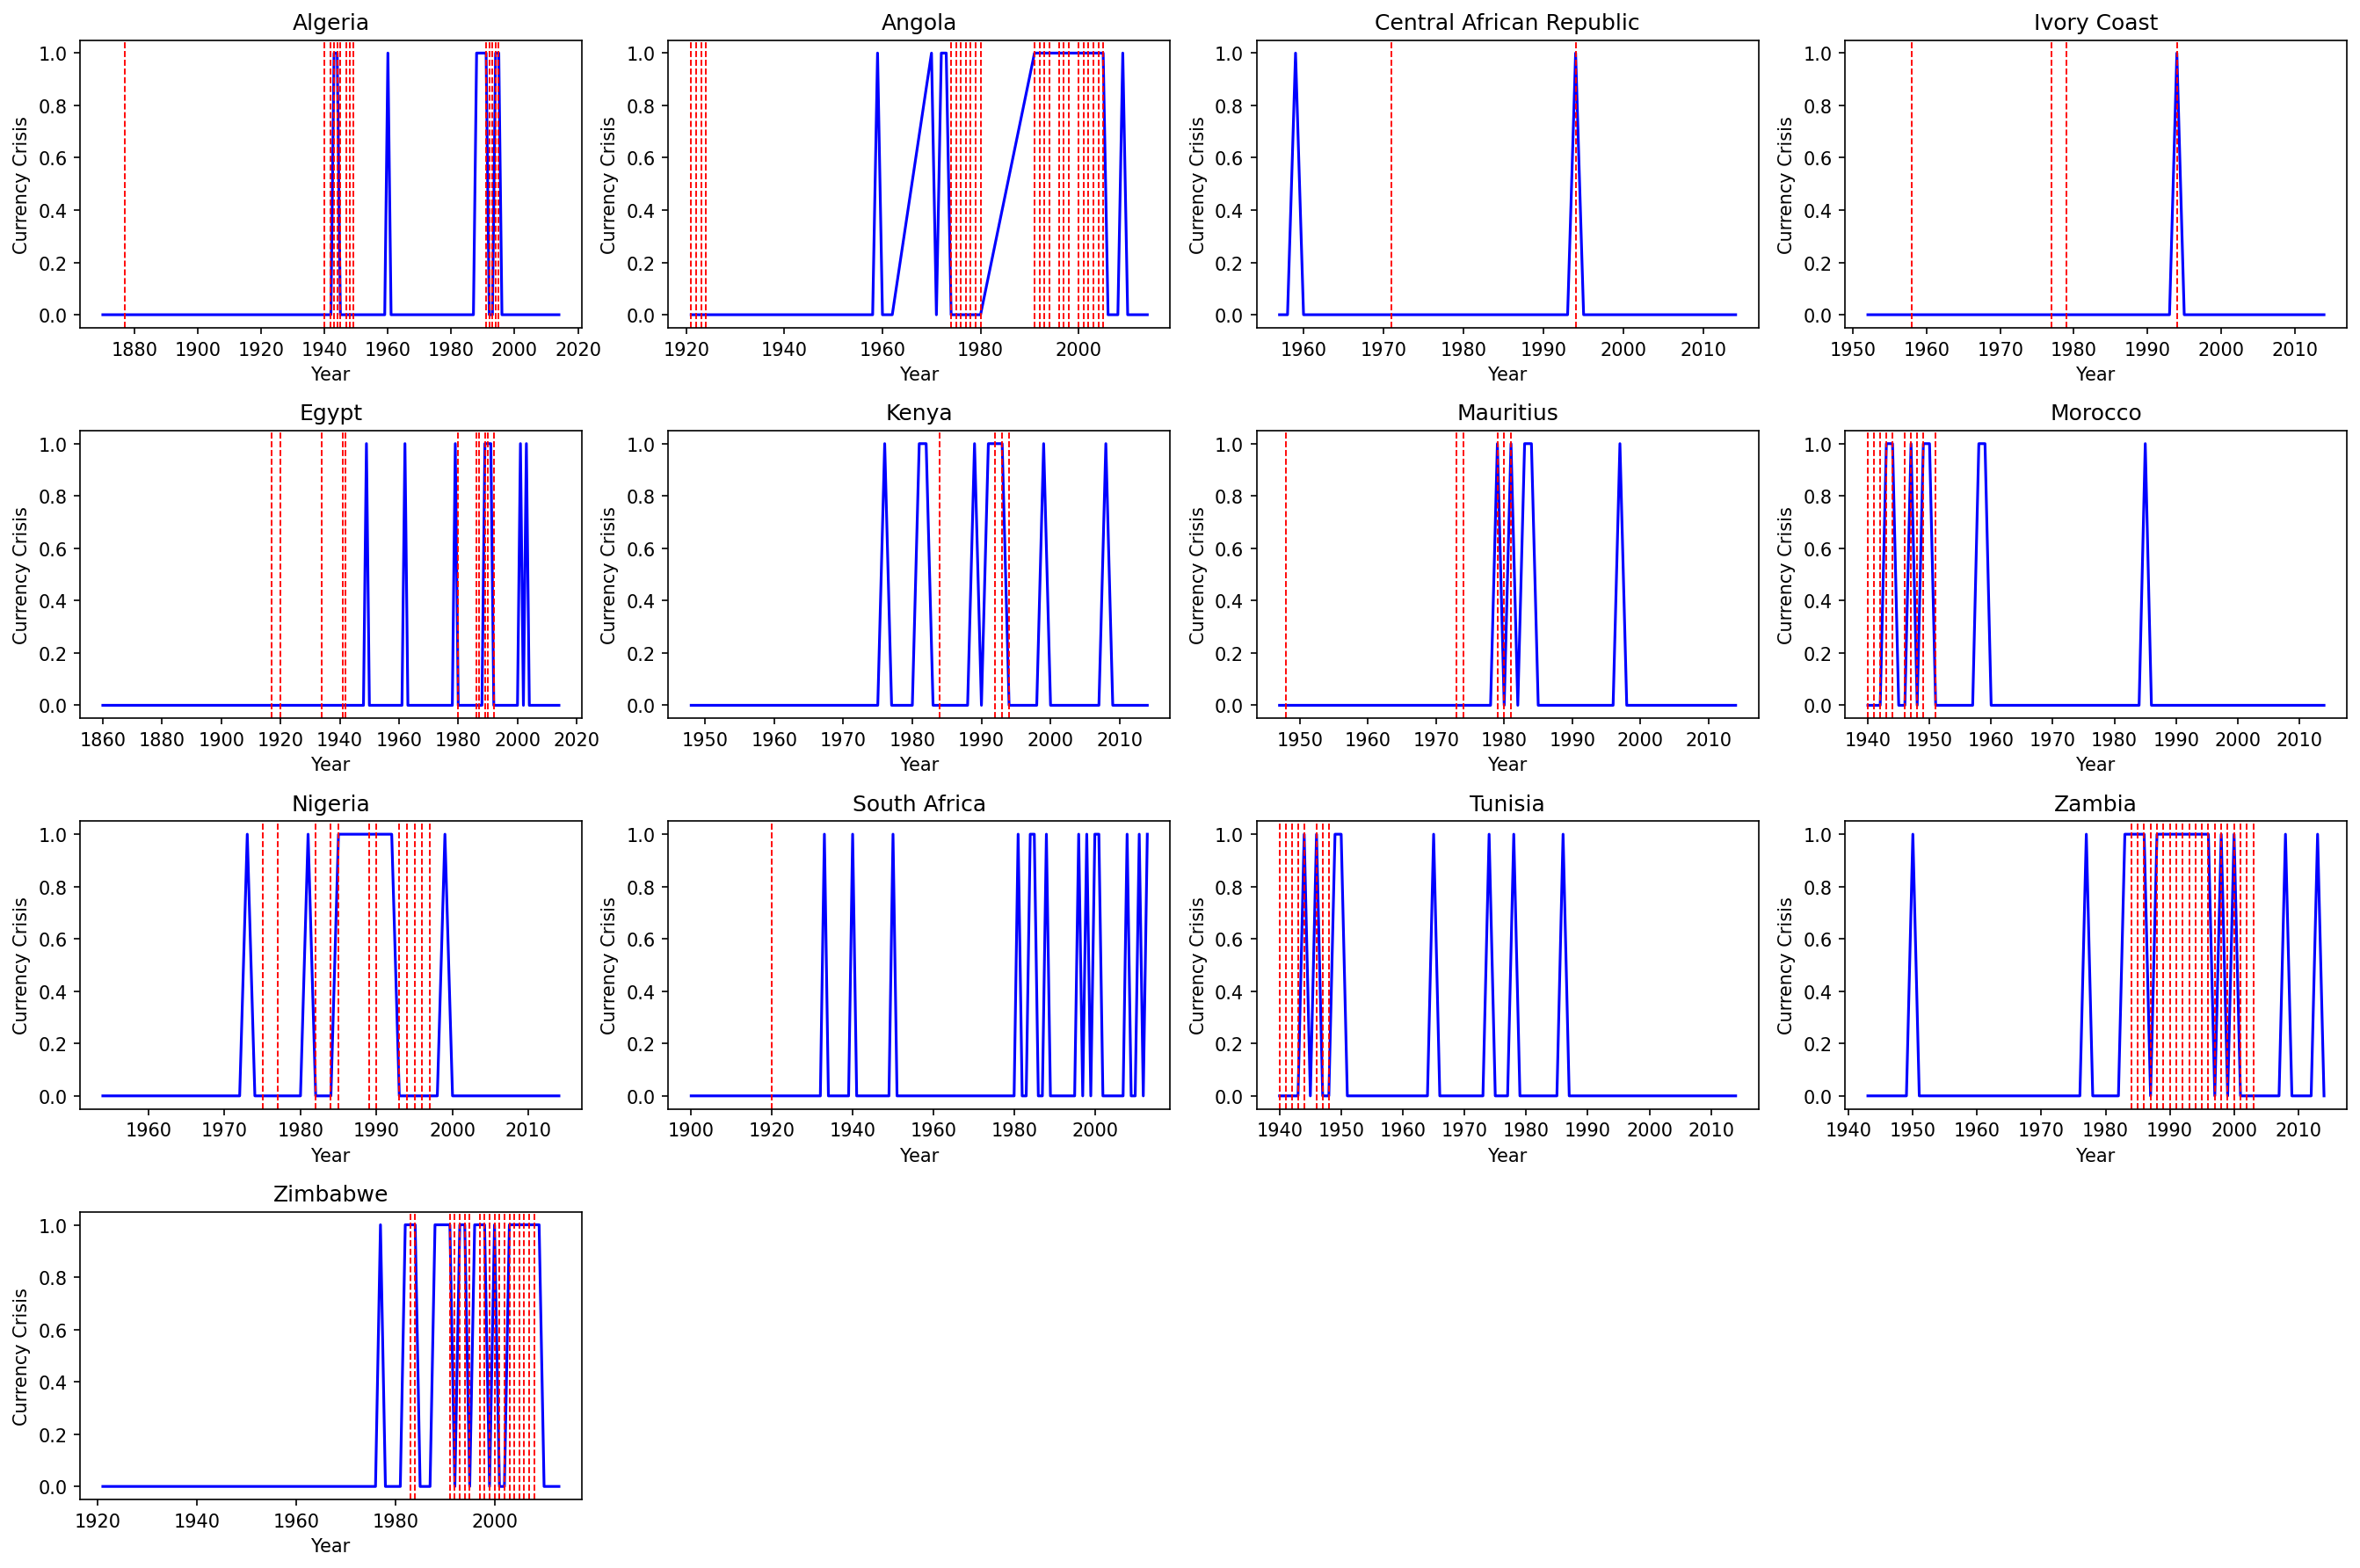

In [202]:
# Red lines are when inflation crisis occured and blue is the currency crisis
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(18,12), dpi= 150)
axes = axes.flatten()
for i, ax in zip(df['country'].unique(), axes):
  sns.lineplot(x = 'year', y = 'currency_crises', data = df[df['country'] == i], ax = ax, color = 'blue')
  ax.set_xlabel('Year')
  ax.set_ylabel('Currency Crisis')
  ax.set_title('{}'.format(i))
  systemic_crisis = df[(df['country'] == i) & (df['inflation_crises'] == 1)]['year'].unique()
  for i in systemic_crisis:
    ax.axvline(x=i, color='red', linestyle='--', linewidth=.9)
fig.subplots_adjust(top=0.95)
for i in range(13,16):
  fig.delaxes(axes[i])
plt.tight_layout()
plt.savefig('currency_crisis_and_inflation_crisis.png')

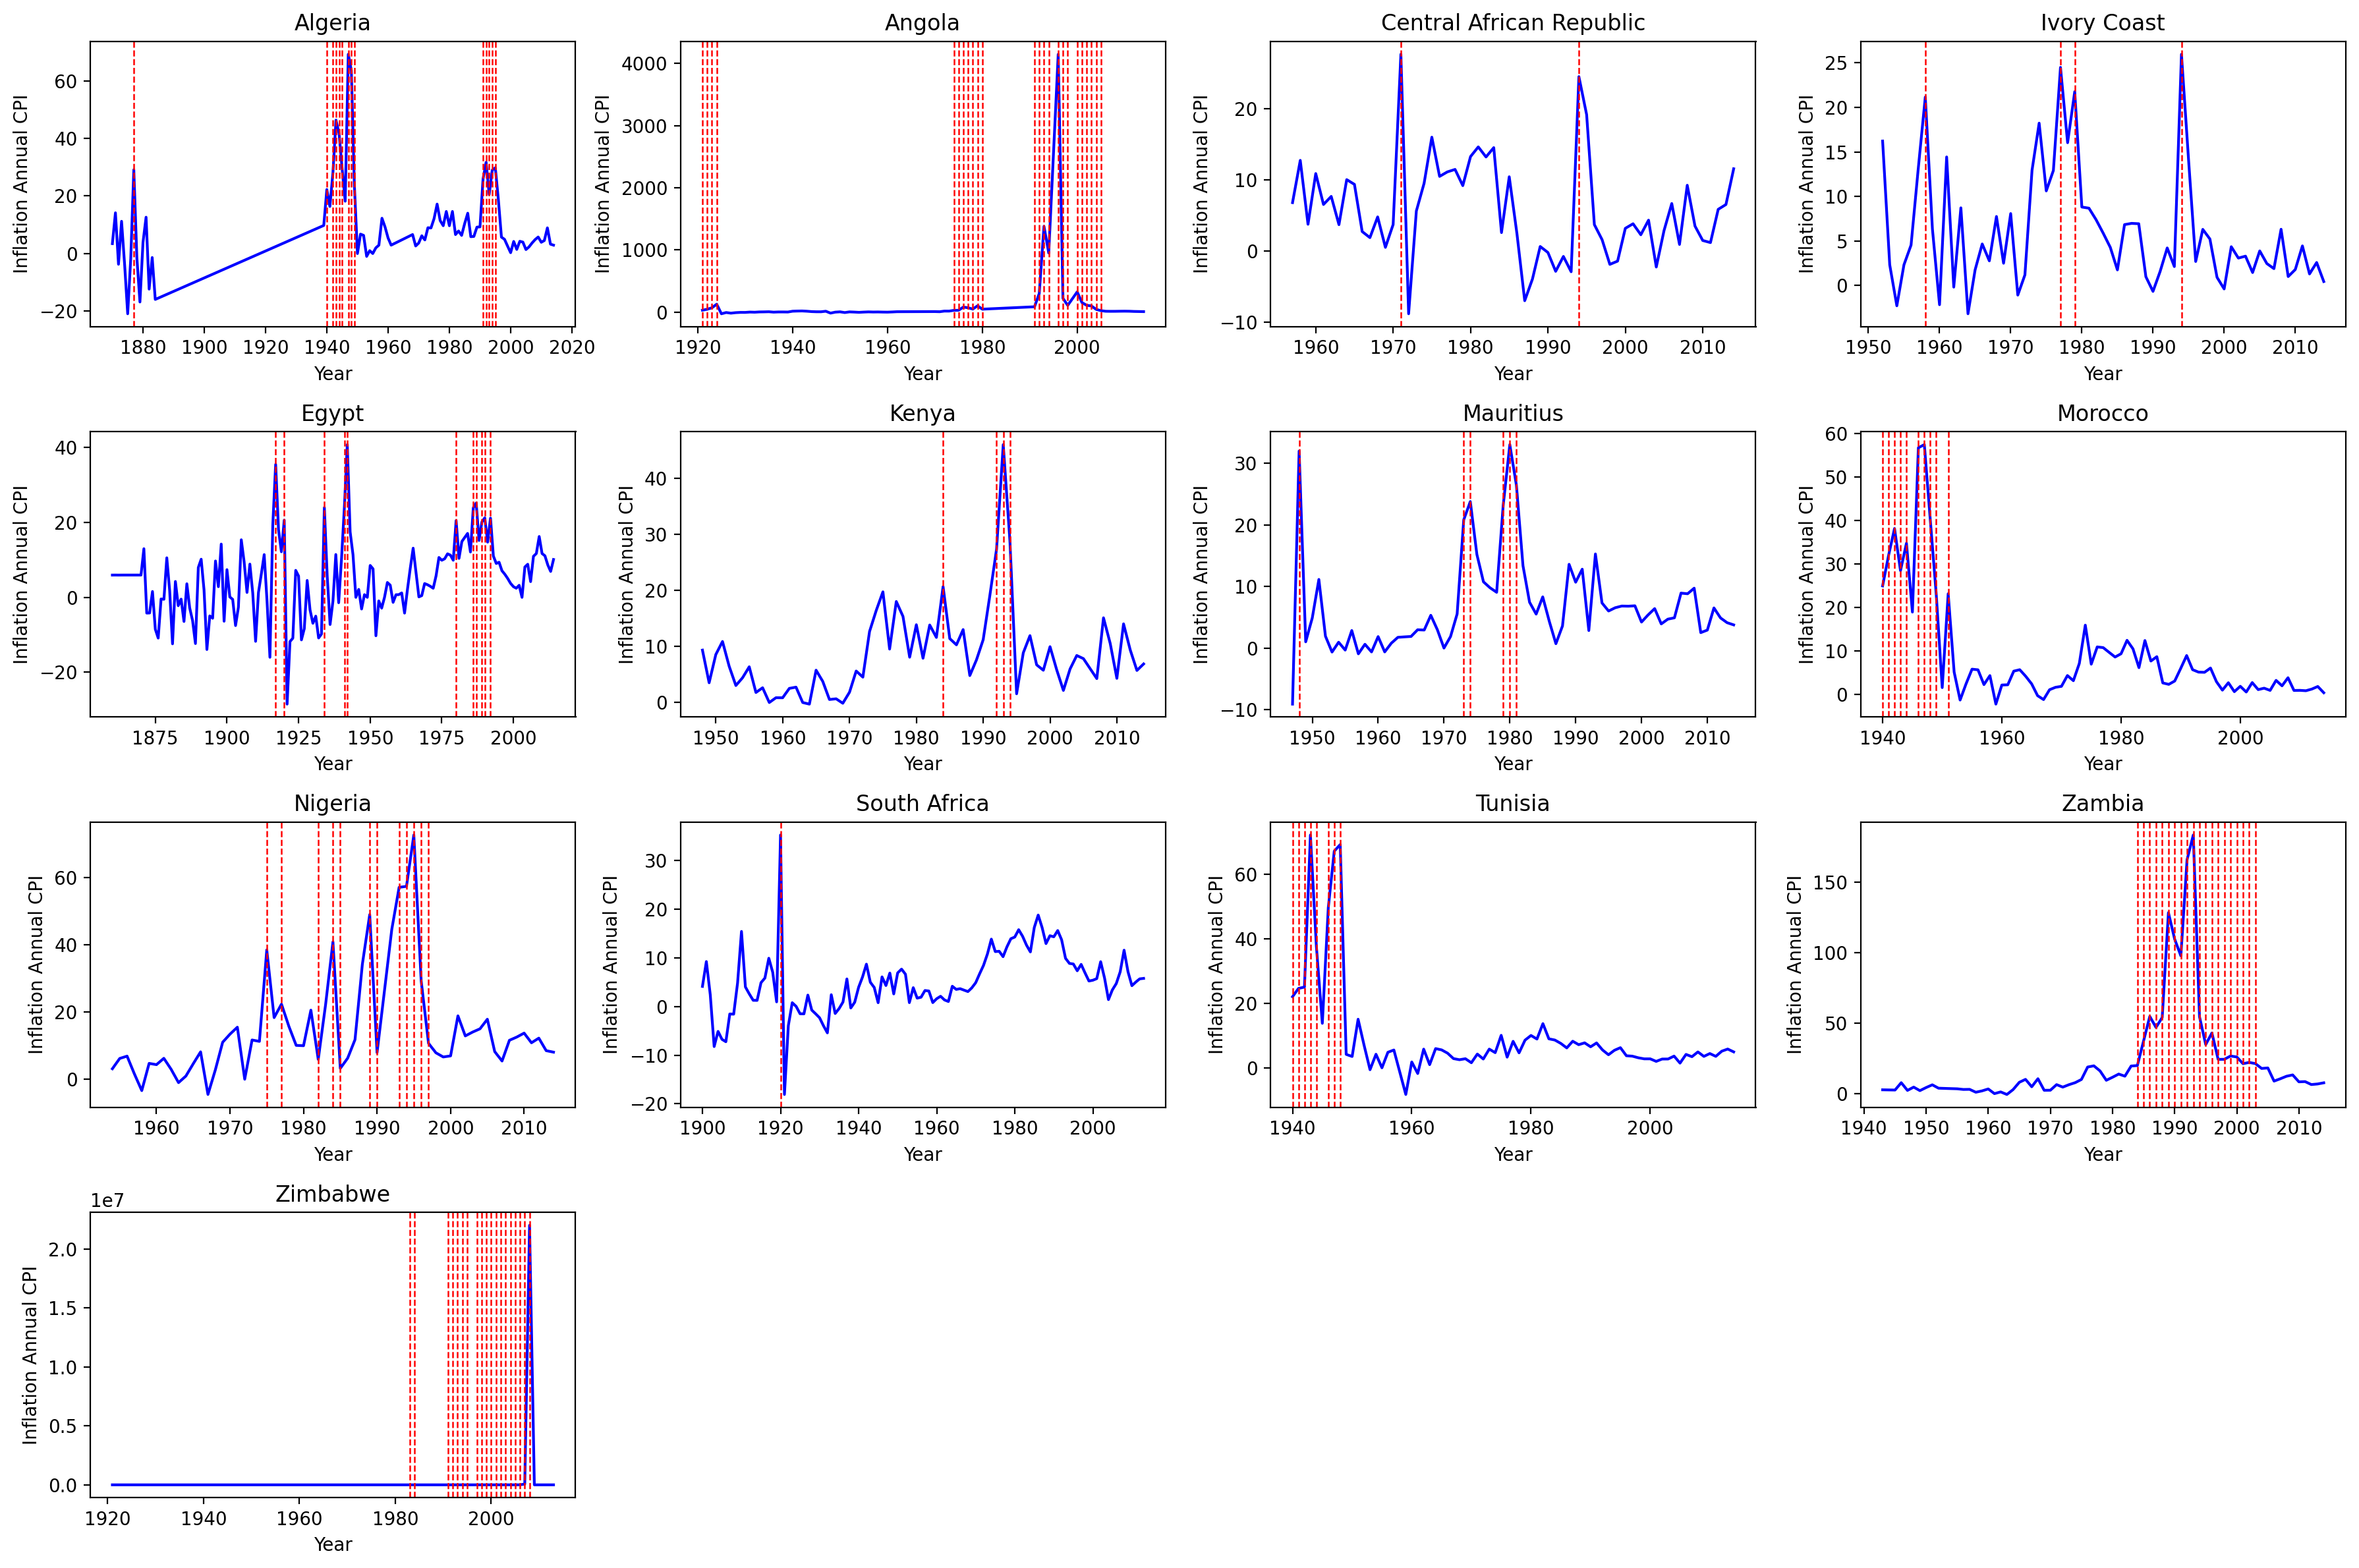

In [203]:
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(18,12), dpi= 200)
axes = axes.flatten()
for i, ax in zip(df['country'].unique(), axes):
  sns.lineplot(x = 'year', y = 'inflation_annual_cpi', data = df[df['country'] == i], ax = ax, color = 'blue')
  ax.set_xlabel('Year')
  ax.set_ylabel('Inflation Annual CPI')
  ax.set_title('{}'.format(i))
  systemic_crisis = df[(df['country'] == i) & (df['inflation_crises'] == 1)]['year'].unique()
  for i in systemic_crisis:
    ax.axvline(x=i, color='red', linestyle='--', linewidth=.9)
# deleting the last 3 plots because they're empty 
fig.subplots_adjust(top=0.95)
for i in range(13,16):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig('annual_inflation_cpi_and_inflation_crisis.png')

In [194]:
# Quantifying the annual inflation cpi at which inflation crisis become certain
len(df[(df['inflation_annual_cpi'] > 20) & (df['inflation_crises'] == 1 )])

131

In [195]:
# Quantifying the annual inflation cpi at which inflation crisis become certain
len(df[(df['inflation_annual_cpi'] < 20) & (df['inflation_crises'] ==1 )])

4

In [171]:
# Showing the countries average annual inflation cpi with respect to inflation & currency crisis
df.groupby('country').agg({'inflation_annual_cpi':'mean','inflation_crises':'sum','currency_crises':'sum'})

,inflation_annual_cpi,inflation_crises,currency_crises
country,,,
Algeria,9.920998,14,9.0
Angola,117.206509,24,18.0
Central African Republic,5.849863,2,2.0
Egypt,4.762431,11,8.0
Ivory Coast,6.109254,4,1.0
Kenya,8.725192,4,9.0
Mauritius,6.854715,6,5.0
Morocco,8.680358,10,8.0
Nigeria,14.766862,12,10.0
